<a href="https://colab.research.google.com/github/Emiliewu/datascience-assignments/blob/main/week3_d1_demo_Univariate_Categorical_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Categorical Plots

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

## Load Data

In [3]:
# file path should be copied from your google drive 
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-cleaned-eda.csv"
df = pd.read_csv(fname)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60,7200,Pave,MISSING,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134,19378,Pave,MISSING,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,MISSING,320000.0,3,2006,3.0,1.0
2,534275170,RL,-1,12772,Pave,MISSING,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,MISSING,151500.0,4,2007,1.0,0.0
3,528104050,RL,114,14803,Pave,MISSING,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,MISSING,385000.0,6,2008,3.0,0.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,MISSING,193800.0,2,2007,3.0,0.0


##Identifying Our Categorical Features

In [4]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence'],
      dtype='object')

Before we begin plotting, let's check our categorical columns for how many unique categories are in each column.

In [5]:
# Checking how many categories in each column
df[cat_cols].nunique()

MS Zoning        7
Street           2
Alley            3
Utilities        3
Neighborhood    28
Bldg Type        5
House Style      8
Exter Qual       4
Exter Cond       5
Central Air      2
Garage Type      7
Garage Qual      6
Garage Cond      6
Paved Drive      3
Fence            5
dtype: int64

Let's start with a simple column with just 2-3 categories, like "Alley".

#Categorical Plots with Pandas
Let's examine the "Alley" column with .value_counts()

In [6]:
# Saving the value counts
val_counts = df['Alley'].value_counts()
val_counts

MISSING    2732
Grvl        120
Pave         78
Name: Alley, dtype: int64

Now we will create a bar graph using the value counts.

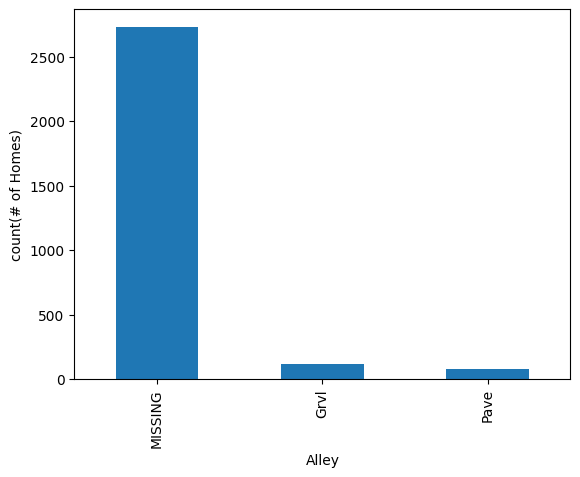

In [7]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind ='bar')
ax.set_ylabel("count(# of Homes)");
ax.set_xlabel("Alley");

##Plotting the Frequency (Value Counts as a % of total)
What if we wanted to display the result as the frequency instead of the raw count? In other words, we want to know what percentage of the total number of rows falls into each category.

We can add normalize=True to value_counts convert the raw counts to ratios that sum to 1.

If we multiply the ratios by 100 we will have our values as a percent of the total.


In [8]:
# Saving the Normalized Value Counts
val_counts_norm = df['Alley'].value_counts(normalize=True) * 100
val_counts_norm

MISSING    93.242321
Grvl        4.095563
Pave        2.662116
Name: Alley, dtype: float64

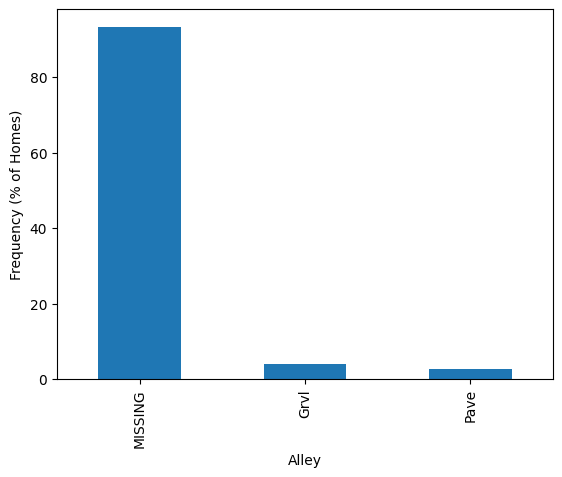

In [9]:
# Plot value counts as a bar graph
ax = val_counts_norm.plot(kind='bar')
ax.set_ylabel("Frequency (% of Homes)");
ax.set_xlabel("Alley");

#Categorical Plots with Seaborn
Seaborn has a function designed to show the counts of each category in a column, called sns.countplot. It also returns an Axes object, which we can save and continue to use to modify our graph.

Let's first apply sns.countplot with the Alley column:

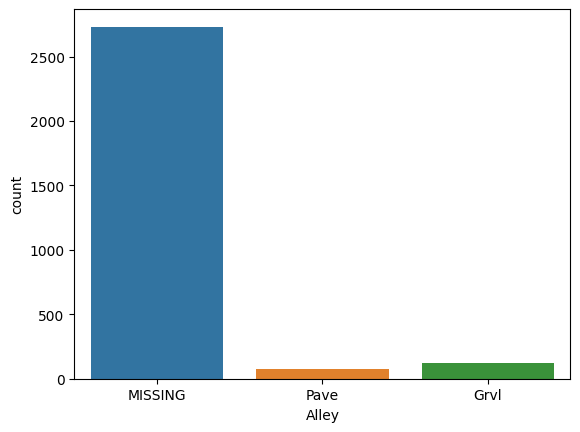

In [10]:
# Seaborn countplot
ax = sns.countplot(data=df, x="Alley")

Notice that, as we've seen with other Seaborn plotting functions, it did more work on our behalf (i.e. adding an xlabel, a ylabel, and coloring each group separately).

## Visualizing Many Categories
Let's identify a categorical feature that has a large number of categories.

Now, let's check our .nunique():

In [11]:
# Checking the nunique in cat_cols
df[cat_cols].nunique()

MS Zoning        7
Street           2
Alley            3
Utilities        3
Neighborhood    28
Bldg Type        5
House Style      8
Exter Qual       4
Exter Cond       5
Central Air      2
Garage Type      7
Garage Qual      6
Garage Cond      6
Paved Drive      3
Fence            5
dtype: int64

Neighborhood has 28 categories. Let's visualize the countplot with such a large number of groups.

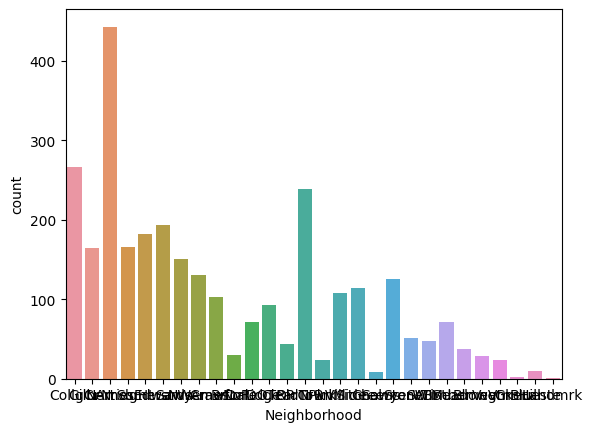

In [12]:
# Countplot with many categories
ax = sns.countplot(data=df, x="Neighborhood")

Let's fix our tick labels using the oop method, ax.set_xticklabels().

Specifically `ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

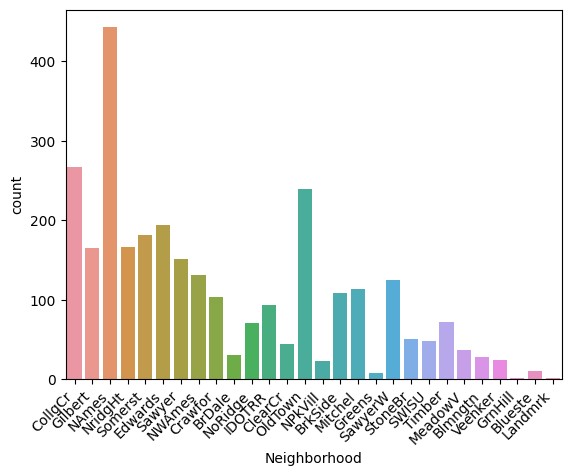

In [15]:
# Countplot with any categories, rotate labels
ax = sns.countplot(data=df, x="Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Now that we have rotated the labels, we can read the Neighborhood names. However, with such a large number of groups, it can be a bit difficult to rank which Neighborhoods have the highest counts at a glance.

We can fix this by sorting the bars from highest count to lowest so that we can easily see which Neighborhoods have more than others.

#Ordering Groups in Seaborn Plots
Most of Seaborn's plotting functions for categorical features include an order argument, which expects a list of category names in the order they should appear on the graph.

Unfortunately, there is not a simple keyword argument to accomplish this (yet). However, we can use .value_counts() to get the Series sorted from most frequent to least, and then use its .index to grab the list of group names in the correct order.

In [16]:
# Saving the value_counts to use with seaborn
val_counts = df['Neighborhood'].value_counts()
val_counts.head(10)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Name: Neighborhood, dtype: int64

Now, will use .index to get the names in order based on the value count.

In [17]:
# We need to use the val_counts.index to get the names in order
val_counts.index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
       'Gilbert', 'Sawyer', 'NWAmes', 'SawyerW', 'Mitchel', 'BrkSide',
       'Crawfor', 'IDOTRR', 'Timber', 'NoRidge', 'StoneBr', 'SWISU', 'ClearCr',
       'MeadowV', 'BrDale', 'Blmngtn', 'Veenker', 'NPkVill', 'Blueste',
       'Greens', 'GrnHill', 'Landmrk'],
      dtype='object')

Next, we will include the order argument to create the plot.

[Text(0, 0, 'NAmes'),
 Text(1, 0, 'CollgCr'),
 Text(2, 0, 'OldTown'),
 Text(3, 0, 'Edwards'),
 Text(4, 0, 'Somerst'),
 Text(5, 0, 'NridgHt'),
 Text(6, 0, 'Gilbert'),
 Text(7, 0, 'Sawyer'),
 Text(8, 0, 'NWAmes'),
 Text(9, 0, 'SawyerW'),
 Text(10, 0, 'Mitchel'),
 Text(11, 0, 'BrkSide'),
 Text(12, 0, 'Crawfor'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'Timber'),
 Text(15, 0, 'NoRidge'),
 Text(16, 0, 'StoneBr'),
 Text(17, 0, 'SWISU'),
 Text(18, 0, 'ClearCr'),
 Text(19, 0, 'MeadowV'),
 Text(20, 0, 'BrDale'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'Veenker'),
 Text(23, 0, 'NPkVill'),
 Text(24, 0, 'Blueste'),
 Text(25, 0, 'Greens'),
 Text(26, 0, 'GrnHill'),
 Text(27, 0, 'Landmrk')]

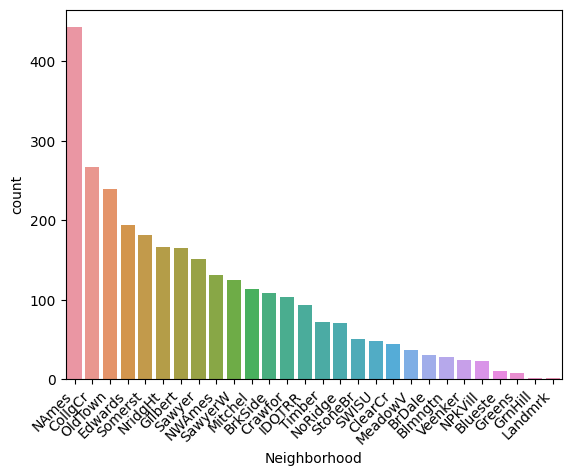

In [19]:
# Creating a Countplot with seaborn (ordered by count)
ax = sns.countplot(data=df, x="Neighborhood", order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  ha='right')

Now have all 28 Neighborhood counts easily visible and ranked from most frequent to least frequent.